Parte 1

In [27]:
def sumatoria_for(N):
    serie = 0.0
    list_s = []
    for i in range(N):
        serie += (1.0/(2*i+1))*((-1)**i)
        list_s.append(serie)
    
    return serie, list_s
N = 4000
serie, list_s = sumatoria_for(N)

In [30]:
serie, list_s


(0.7853356633984261,
 [1.0,
  0.6666666666666667,
  0.8666666666666667,
  0.7238095238095239,
  0.8349206349206351,
  0.7440115440115441,
  0.8209346209346211,
  0.7542679542679545,
  0.8130914836797192,
  0.7604599047323508,
  0.8080789523513985,
  0.7646006914818333,
  0.8046006914818333,
  0.7675636544447964,
  0.802046413065486,
  0.769788348549357,
  0.8000913788523872,
  0.7715199502809587,
  0.7985469773079856,
  0.77290595166696,
  0.797296195569399,
  0.7740403816159106,
  0.7962626038381329,
  0.774986008093452,
  0.7953941713587581,
  0.7757863282215032,
  0.7946542527498051,
  0.7764724345679869,
  0.7940162942171096,
  0.7770671416747368,
  0.7934605842976876,
  0.7775875684246718,
  0.7929721838092871,
  0.7780468106749587,
  0.7925395642981471,
  0.7784550572558936,
  0.7921536873928798,
  0.7788203540595465,
  0.7918073670465595,
  0.7791491391984583,
  0.7914948182108039,
  0.7794466254397195,
  0.7912113313220724,
  0.7797170784485092,
  0.790953033504689,
  0.7799640

In [31]:
import matplotlib.pyplot as plt


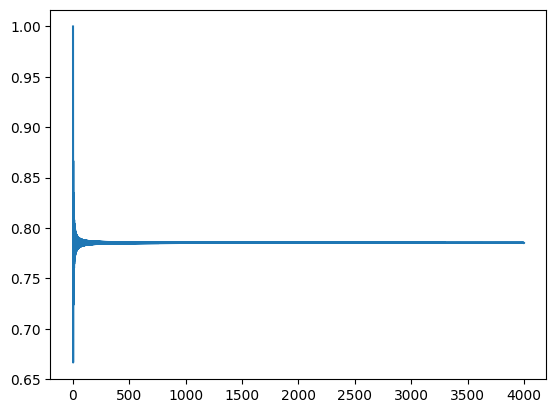

In [32]:
plt.plot(range(1,N+1),list_s)

Parte 2


In [39]:
import math
def sumatoria_while_1(ref,pres):
    serie = 0.0
    orig = ref/4
    i=0
    list_s =[]
    while(1):
        serie += (1.0/(2*i+1))*((-1)**i)
        error = abs((orig-serie)/orig)
        list_s.append(serie)
        if(error<pres):
            break
        i+=1
    return serie,list_s,i

ref=math.pi
pres=1e-4
serie, list_s,i = sumatoria_while_1(ref,pres)
serie    

0.785319645811445

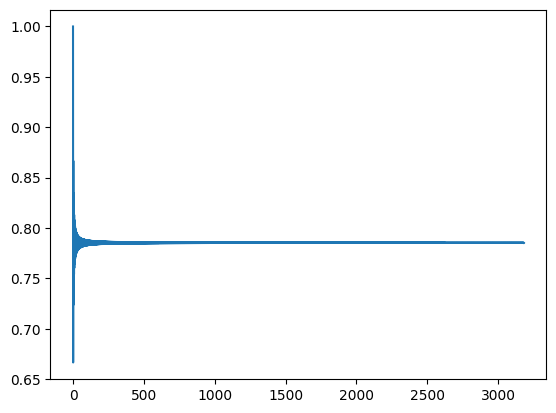

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(0,i+1),list_s)

Parte 3


In [52]:

def sumatoria_while_2(pres):
    serie = 0.0
    i = 0
    error = 1.0
    copia_s=0.0
    lista_s = []
    while(1):
        serie += (1.0/(2*i+1))*((-1)**i)
        lista_s.append(serie)
        if(i>0):
            error = abs((copia_s - serie)/copia_s)

        if(error<pres):
            break
        copia_s = serie
        i+=1
    return serie, lista_s, i

pres = 1e-5
serie, lista_s, i = sumatoria_while_2(pres)
serie

0.7854020903251704

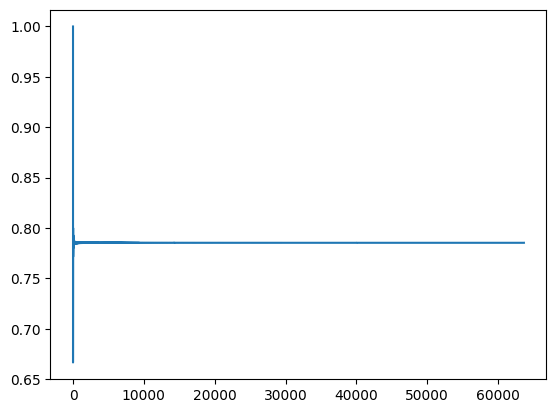

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(0,i+1),lista_s)

Parte 4 y Parte 5

In [87]:

%%file Lab2_20213733.c
#include <stdio.h>
#include <math.h>
#include <stdlib.h>
#define PI 3.141592

//Funciones de la parte 4 que van a ser modificadas para hacer la parte 5
//Función de la PArte 1 en C
double sumatoria_for(int N, double* t_for, int* pos_fin_0){
    double serie = 0.0;
    int i;
    for(i=0; i<N; i++){
        serie += (1.0/(2*i+1))*(pow(-1,i));
        t_for[i] = serie;
    }
    pos_fin_0[0] = i;
    return serie;
}
//Función de la PArte 2 en C modificada para parte 5
double sumatoria_while_1(double ref, double pres, double* t_while_1, int* pos_fin_1){
    double serie = 0.0;
    int i=0;
    double orig = ref/4;
    double error;
    while(1){
        serie += (1.0/(2*i+1))*(pow(-1,i));
        t_while_1[i] = serie;
        error = fabs((orig-serie)/orig);
        if(error<pres){
            break;
        }
        i++;
    }
    pos_fin_1[0] = i;
    return serie;
}
//Función de la PArte 3 en C modificada para parte 5
double sumatoria_while_2(double pres, double* t_while_2, int* pos_fin_2){
    double serie = 0.0;
    int i=0;
    double error =1.0;
    double copia_s = 0.0;
    while(1){
        serie += (1.0/(2*i+1))*(pow(-1,i));
        t_while_2[i] = serie;
        if(i>0){
            error = fabs((copia_s - serie)/copia_s);
        }
        if(error<pres){
            break;
        }
    }
    pos_fin_2[0] = i;
    return serie;
}
//funcion para imprimir los últimos 5 datos

void imprimir_terminos(double* terms, int tam){
    printf("%lf\t%lf\t%lf\t%lf\t%lf\n",terms[tam-5],terms[tam-4],terms[tam-3],terms[tam-2],terms[tam-1]);

}


int main(){
    int N = 4000;
    double ref = PI;
    double pres1 = 1e-4;
    double pres2 = 1e-5;
    int *pos_fin_0;
    int *pos_fin_1;
    int *pos_fin_2;
    double* t_for = (double* )malloc(sizeof(double)*N);
    double* t_while_1 = (double* )malloc(sizeof(double)*N);
    double* t_while_2 = (double* )malloc(sizeof(double)*N);

    
    printf("%lf\n",sumatoria_for(N,t_for,pos_fin_0));
    printf("%lf\n",sumatoria_while_1(ref,pres1,t_while_1,pos_fin_1));
    printf("%lf\n",sumatoria_while_2(pres2,t_while_2,pos_fin_2));
    //Parte 5
    imprimir_terminos(t_for,pos_fin_0);
    imprimir_terminos(t_while_1,pos_fin_1);
    imprimir_terminos(t_while_2,pos_fin_2);

    return 0;
}

Overwriting Lab2_20213733.c


In [88]:
! gcc Lab2_20213733.c -o Lab2 -lm

Lab2_20213733.c: In function ‘main’:
Lab2_20213733.c:80:30: warning: passing argument 2 of ‘imprimir_terminos’ makes integer from pointer without a cast []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wint-conversion-Wint-conversion]8;;]
   80 |     imprimir_terminos(t_for, pos_fin_0);
      |                              ^~~~~~~~~
      |                              |
      |                              int *
Lab2_20213733.c:57:43: note: expected ‘int’ but argument is of type ‘int *’
   57 | void imprimir_terminos(double* terms, int tam){
      |                                       ~~~~^~~
Lab2_20213733.c:81:33: warning: passing argument 2 of ‘imprimir_terminos’ makes integer from pointer without a cast []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wint-conversion-Wint-conversion]8;;]
   81 |     imprimir_terminos(t_while_1,pos_fin_1);
      |                                 ^~~~~~~~~
      |                                 |
      |

In [70]:
!./Lab2

0.785336
